In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os

In [5]:
%ls ../pytorch-fm/models/stage1

fm_k768_400k_ip_if0/    fm_k768_400k_ip_lr1e-4/  fm_k768_400k_ip_wd1e-4/
fm_k768_400k_ip_if0.1/  fm_k768_400k_ip_lr1e-6/  fm_k768_400k_ip_wd1e-5/
fm_k768_400k_ip_if1/    fm_k768_400k_ip_wd1e-3/  fm_k768_400k_ip_wd1e-7/


In [6]:
%ls ../pytorch-fm/models/stage1/fm_k768_400k_ip_if0/

config.json  fm.pth  trn.log


In [88]:
def visualize_train_state(log_dirs, ignore_first_steps=0):

    fig, axs = plt.subplots(1, len(log_dirs), figsize=(5 * len(log_dirs), 4.5))

    steps_max = 0
    trn_loss_min, trn_loss_max = np.inf, -np.inf
    tst_mrr_min, tst_mrr_max = np.inf, -np.inf
    
    ax_twins = []
    
    for (title, log_dir), ax in zip(log_dirs.items(), axs.flat):
    
        steps, trn_losses, tst_mrrs = [], [], []
        with open(os.path.join(log_dir, 'trn.log'), 'r') as f:
            log_lines = f.read().splitlines()
            for i, line in enumerate(log_lines):
                
                if 'Early stopping at step' in line:
                    break
                
                info = line.split('     ')[1]
                step = int(info.split(':')[0].strip('Step '))
                stats = info.split(':')[1]
                trn_loss = float(stats.split(',')[0].split('=')[1].strip())
                tst_mrr = float(stats.split(',')[2].split('=')[1].strip())

                steps.append(step)
                trn_losses.append(trn_loss)
                tst_mrrs.append(tst_mrr)
        
        steps_max = max(steps_max, np.max(steps[ignore_first_steps:]))
        trn_loss_min = min(trn_loss_min, np.min(trn_losses[ignore_first_steps:]))
        trn_loss_max = max(trn_loss_max, np.max(trn_losses[ignore_first_steps:]))
        tst_mrr_min = min(tst_mrr_min, np.min(tst_mrrs[ignore_first_steps:]))
        tst_mrr_max = max(tst_mrr_max, np.max(tst_mrrs[ignore_first_steps:]))
                
        ax.plot(steps, trn_losses, 'x-', color='tab:blue', label='loss_trn')
        ax.tick_params(axis='y', colors='tab:blue')
        # ax.set_yscale('log')

        ax_twin = ax.twinx()
        ax_twins.append(ax_twin)
        ax_twin.plot(steps, tst_mrrs, 'x-', color='tab:orange', label='mrr@10_tst')
        ax_twin.tick_params(axis='y', colors='tab:orange')
        # ax_twin.set_yscale('log')
        
        ax.set_title(title)
        
        handles, labels = ax.get_legend_handles_labels()
        handles_twin, labels_twin = ax_twin.get_legend_handles_labels()
        
        fig.legend(handles + handles_twin, labels + labels_twin)
    
    eps = 0.05
    for ax, ax_twin in zip(axs.flat, ax_twins):
        ax.set_xlim(None, steps_max * 1.1)
        ax_twin.set_xlim(None, steps_max * 1.1)
        ax.set_ylim(trn_loss_min - (trn_loss_max - trn_loss_min) * eps, 
                    trn_loss_max + (trn_loss_max - trn_loss_min) * eps)
        ax_twin.set_ylim(tst_mrr_min - (tst_mrr_max - tst_mrr_min) * eps, 
                         tst_mrr_max + (tst_mrr_max - tst_mrr_min) * eps)

    fig.tight_layout()
    plt.show()

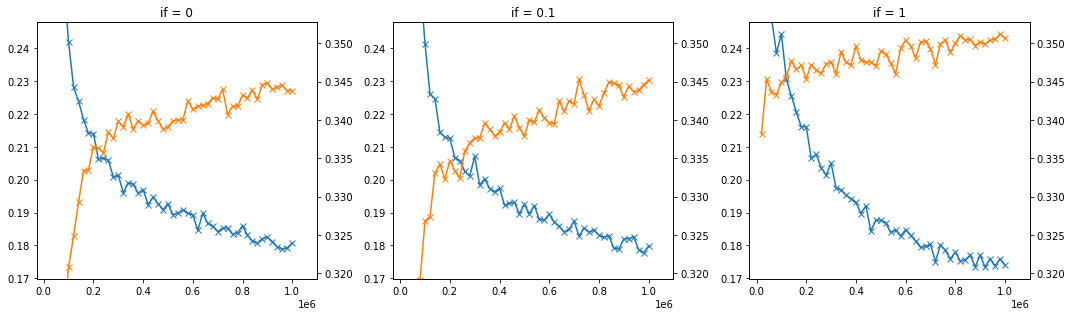

In [74]:
runs = {
    'if = 0': '../pytorch-fm/models/stage1/fm_k768_400k_ip_if0/',
    'if = 0.1': '../pytorch-fm/models/stage1/fm_k768_400k_ip_if0.1/',
    'if = 1': '../pytorch-fm/models/stage1/fm_k768_400k_ip_if1/',
}
visualize_train_state(runs, ignore_first_steps=4)

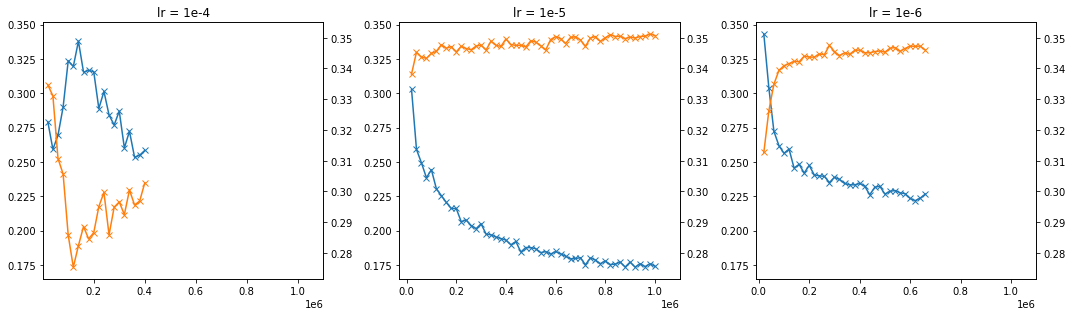

In [66]:
runs = {
    'lr = 1e-4': '../pytorch-fm/models/stage1/fm_k768_400k_ip_lr1e-4/',
    'lr = 1e-5': '../pytorch-fm/models/stage1/fm_k768_400k_ip_if1/',
    'lr = 1e-6': '../pytorch-fm/models/stage1/fm_k768_400k_ip_lr1e-6/',
}
visualize_train_state(runs)

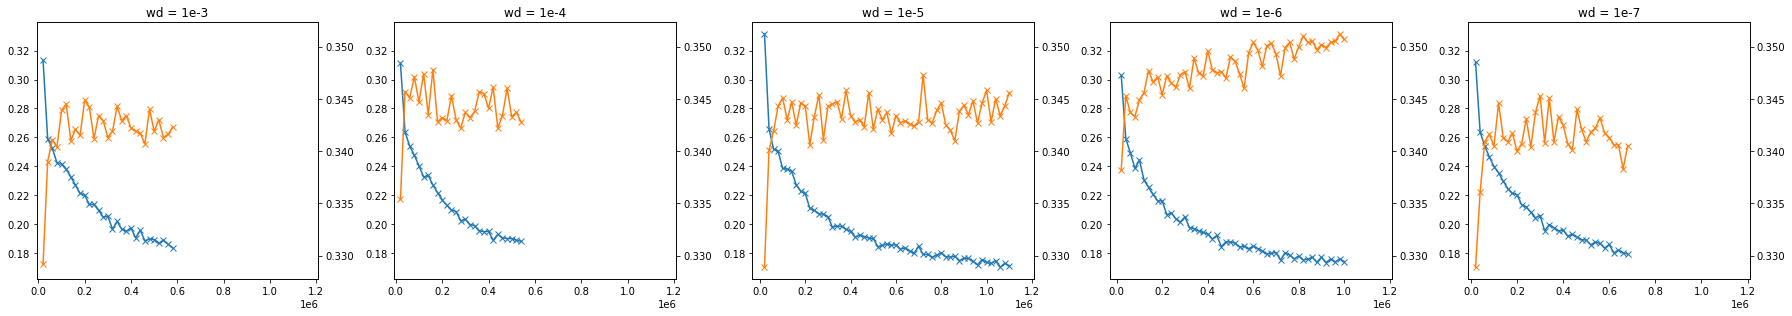

In [67]:
runs = {
    'wd = 1e-3': '../pytorch-fm/models/stage1/fm_k768_400k_ip_wd1e-3/',
    'wd = 1e-4': '../pytorch-fm/models/stage1/fm_k768_400k_ip_wd1e-4/',
    'wd = 1e-5': '../pytorch-fm/models/stage1/fm_k768_400k_ip_wd1e-5/',
    'wd = 1e-6': '../pytorch-fm/models/stage1/fm_k768_400k_ip_if1/',
    'wd = 1e-7': '../pytorch-fm/models/stage1/fm_k768_400k_ip_wd1e-7/',
}
visualize_train_state(runs)

In [75]:
%ls ../pytorch-fm/models/

bce/               fm_k768_400k_bias/     fm_k768_400k_ip/
ce_init_identity/  fm_k768_400k_fm/       stage1/
ce_init_random/    fm_k768_400k_fm_bias/  stage2_original/


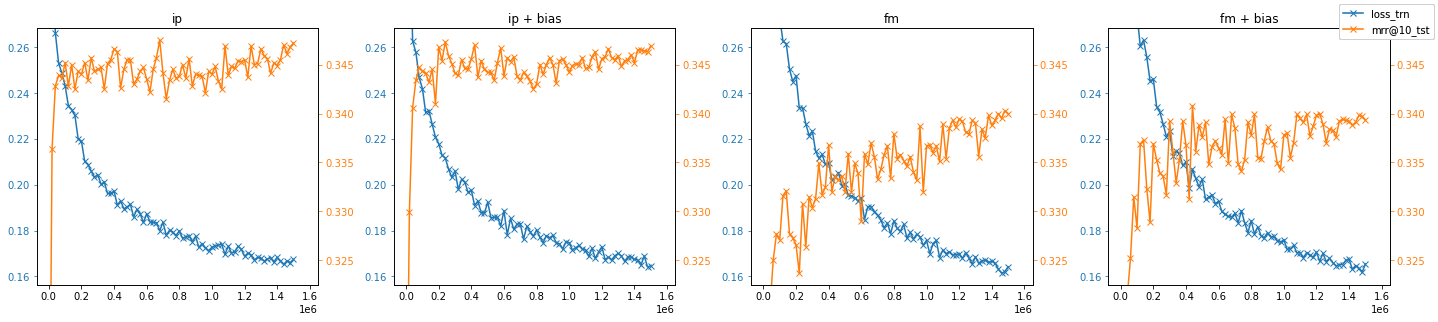

In [89]:
runs = {
    'ip': '../pytorch-fm/models/fm_k768_400k_ip/',
    'ip + bias': '../pytorch-fm/models/fm_k768_400k_bias/',
    'fm': '../pytorch-fm/models/fm_k768_400k_fm/',
    'fm + bias': '../pytorch-fm/models/fm_k768_400k_fm_bias/',
}
visualize_train_state(runs, ignore_first_steps=6)